# An Exploratory Data Analysis of Car Accidents in America(2016-2021)

## Description

#### Source: Kaggle 
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset. This analysis can be used to prevent Car Accidents in the future

# Data Preparation and Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
accidents = pd.read_csv(r'US_Accidents_Dec21_updated.csv')

In [3]:
accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


### Columns

In [4]:
accidents.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Columns and Dtype

In [5]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

### Total number of Accidents recorded

In [6]:
print('Total Number of Accidents recorded :{}'.format(accidents.shape[0]))

Total Number of Accidents recorded :2845342


In [7]:
accidents.shape

(2845342, 47)

In [8]:
accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


### Count the number of numeric columns in the dataset

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [10]:
ac_numerics = accidents.select_dtypes(include=numerics)

In [11]:
ac_numerics

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,NaN,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.102660,-84.524680,39.102090,-84.523960,0.055,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,41.062130,-81.537840,41.062170,-81.535470,0.123,NaN,39.0,NaN,55.0,29.65,10.0,NaN,NaN
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,NaN,37.0,29.8,93.0,29.69,10.0,10.4,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,33.998880,-117.370940,0.543,NaN,86.0,86.0,40.0,28.92,10.0,13.0,0.00
2845338,2,32.766960,-117.148060,32.765550,-117.153630,0.338,NaN,70.0,70.0,73.0,29.39,10.0,6.0,0.00
2845339,2,33.775450,-117.847790,33.777400,-117.857270,0.561,NaN,73.0,73.0,64.0,29.74,10.0,10.0,0.00
2845340,2,33.992460,-118.403020,33.983110,-118.395650,0.772,NaN,71.0,71.0,81.0,29.62,10.0,8.0,0.00


#### Numeric columns 

In [12]:
ac_numerics.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

#### Number of Numeric columns

In [13]:
len(ac_numerics.columns)

14

### Missing Values

In [14]:
nulls = accidents.isnull().sum().sort_values(ascending=False)
nulls

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

### Percentages of missing values per column

In [15]:
missing_percent = accidents.isnull().sum().sort_values(ascending=False) * 100 /len(accidents)
missing_percent

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

### Columns with Null values

In [16]:
nulls[nulls != 0]

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
dtype: int64

### What is the total number of columns with Null value or values?

In [17]:
len(nulls[nulls != 0])

20

#### Bar plot

In [18]:
plt.style.use('ggplot')

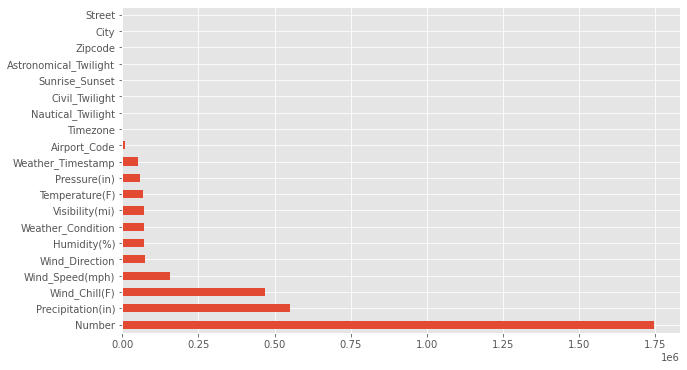

In [19]:
nulls[nulls != 0].plot(kind='barh', figsize=(10,6));

### String dates to datetime

In [20]:
accidents.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [21]:
accidents.Start_Time = pd.to_datetime(accidents.Start_Time)

In [22]:
accidents.End_Time = pd.to_datetime(accidents.End_Time)

### Set index to 'ID' column

In [23]:
accidents.set_index('ID', inplace=True)

# Location Analysis

## City Analysis

### How many cities were recorded in the dataset?

In [24]:
cities = accidents.City.unique()
cities

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

### Number of cities recorded

In [25]:
len(accidents.City.unique())

11682

### Top 10 cities with the highest Road Accident record

In [26]:
cities_by_accident = accidents.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [27]:
top10_cities = cities_by_accident[:10]
top10_cities

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

#### Bar plot

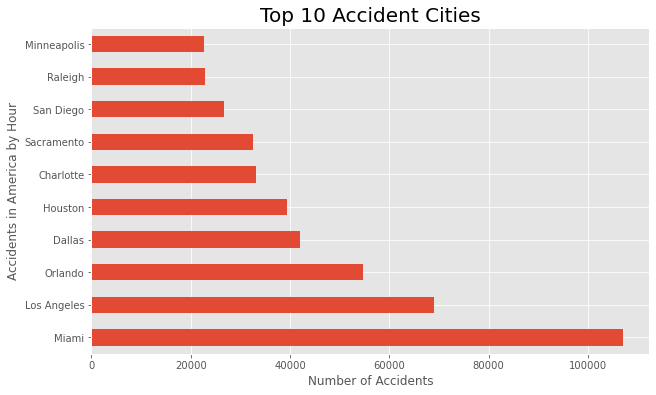

In [28]:
top10_cities.plot(kind='barh', figsize=(10,6))
plt.title('Top 10 Accident Cities', fontsize=20)
plt.xlabel('Number of Accidents')
plt.ylabel('Accidents in America by Hour');

### What does the distribution of Accident Cities look like in a Histogram?

In [29]:
sns.set_style('darkgrid')

#### Histogram

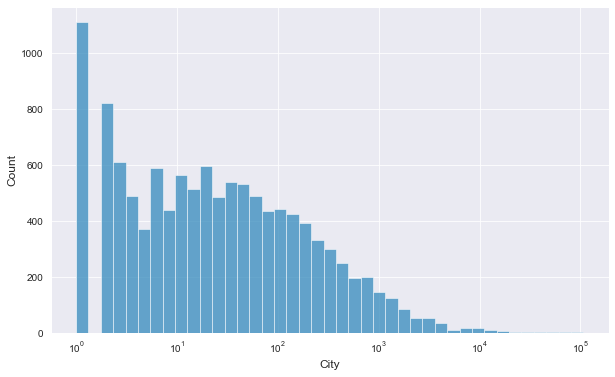

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(cities_by_accident, log_scale=True);

### Number of cities with less or equal to 5 Road Accident records

In [31]:
len(cities_by_accident[cities_by_accident <= 5])

3399

### Show distribution by High Accident Cities(accidents greater or equal to 1000) and Low Accident Cities(Accidents less than 1000)

In [32]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [33]:
len(high_accident_cities) * 100 / len(cities)

4.245848313644924

In [34]:
len(low_accident_cities) * 100 / len(cities)

95.74559150830338

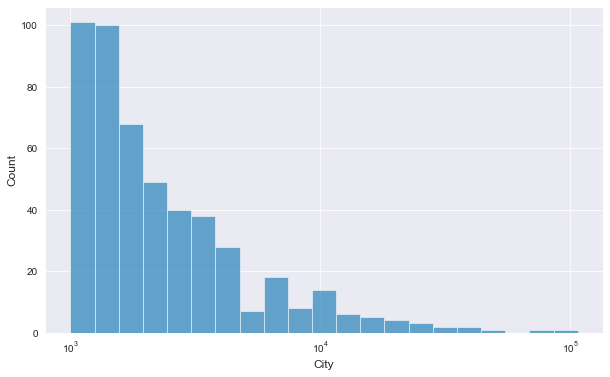

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(high_accident_cities, log_scale=True);

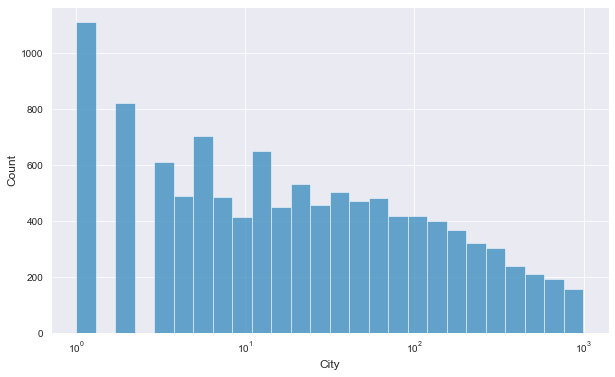

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(low_accident_cities,log_scale=True);

## State Analysis

### Top 20 States with the Highest Accident record

In [37]:
states_by_accident = accidents.State.value_counts()

In [38]:
states_by_accident.head(20)

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
Name: State, dtype: int64

#### Bar plot

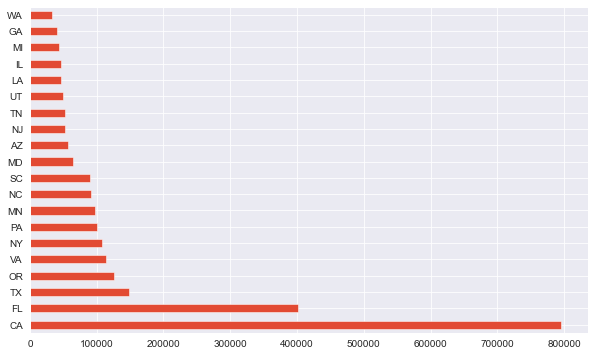

In [39]:
states_by_accident.head(20).plot(kind='barh', figsize=(10,6));

### What does the distribution of Accident States look like in a Histogram?

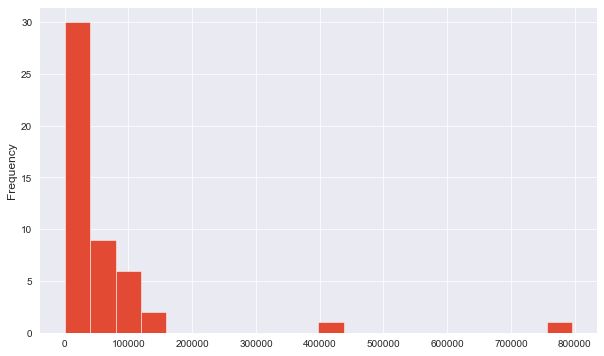

In [40]:
states_by_accident.plot(kind='hist',bins=20, figsize=(10,6));

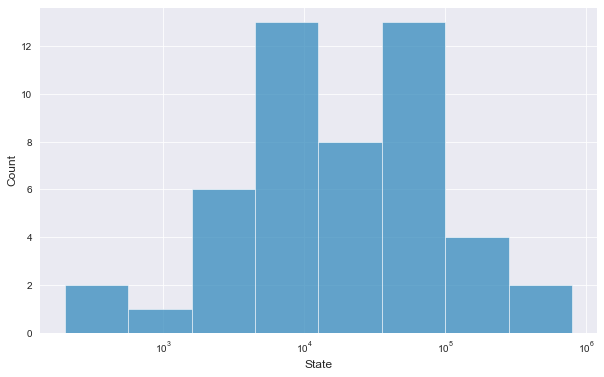

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(states_by_accident, log_scale=True);

### Show distribution by High Accident States(accidents greater or equal to 50000) and Low Accident States(Accidents less than 50000)

In [42]:
high_accident_states = states_by_accident[states_by_accident >= 50000]
low_accident_states = states_by_accident[states_by_accident < 50000]

In [43]:
high_accident_states

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
Name: State, dtype: int64

In [44]:
low_accident_states

UT    49193
LA    47232
IL    47105
MI    43843
GA    40086
WA    32554
CT    29762
MO    29633
CO    25340
OH    24409
IN    20850
AL    19322
MT    15964
AR    10935
IA     9607
DC     9133
KS     9033
OK     8806
ID     8544
WI     7896
WV     7632
KY     6638
MA     6392
NV     6197
MS     5320
DE     4842
RI     4451
NH     3866
NE     3320
NM     2370
ND     2258
ME     2193
WY      990
VT      365
SD      201
Name: State, dtype: int64

#### Histogram of High Accident States

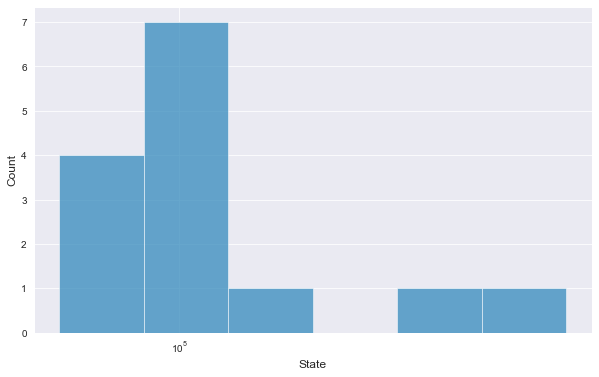

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(high_accident_states, log_scale=True);

#### Histogram of Low Accident States

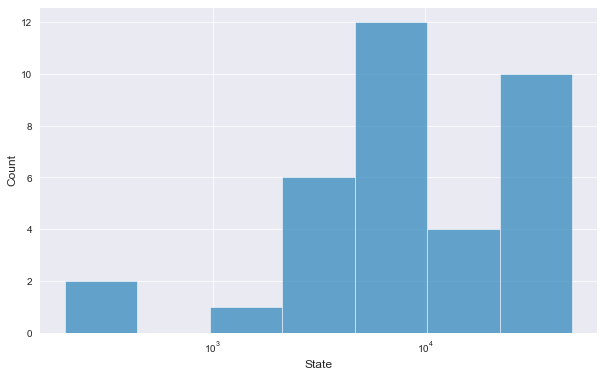

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(low_accident_states, log_scale=True);

## Timezone Analysis

### Show number of accidents for different Timezone

In [47]:
accidents.Timezone.value_counts()

US/Eastern     1221927
US/Pacific      967094
US/Central      488065
US/Mountain     164597
Name: Timezone, dtype: int64

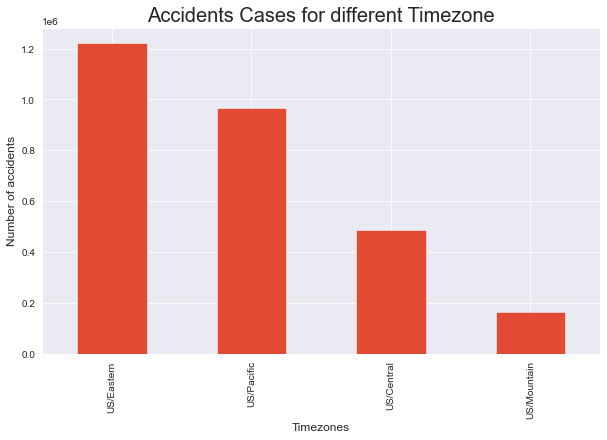

In [48]:
accidents.Timezone.value_counts().plot(kind=('bar'), figsize=(10,6))
plt.title('Accidents Cases for different Timezone', fontsize=20)
plt.xlabel('Timezones')
plt.ylabel('Number of accidents');

## Street Analysis

### Show total number of streets recorded

In [49]:
print('Total Number of Streets recorded :{}'.format(len(accidents.Street)))

Total Number of Streets recorded :2845342


### Show Top 10 Highest Accident streets

In [50]:
street_df = pd.DataFrame(accidents['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'}).set_index('Street No.')
street_df

,Cases
Street No.,
I-95 N,39853
I-5 N,39402
I-95 S,36425
I-5 S,30229
I-10 E,26164
...,...
Villareal Dr,1
La Jacaranda,1
SW 273rd Ln,1


In [51]:
top_ten_streets = pd.DataFrame(street_df.head(10))

#### Bar plot

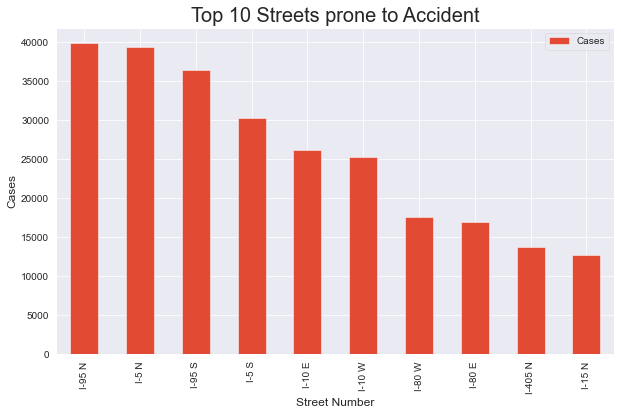

In [52]:
top_ten_streets.plot(kind=('bar'), figsize=(10,6))
plt.title('Top 10 Streets prone to Accident', fontsize=20)
plt.xlabel('Street Number')
plt.ylabel('Cases');

### Number of Street Accidents and their percentages

In [53]:
def street_cases_percentage(val, operator):
    if operator == '=':
        val = street_df[street_df['Cases']==val].shape[0]
    elif operator == '>':
        val = street_df[street_df['Cases']>val].shape[0]
    elif operator == '<':
        val = street_df[street_df['Cases']<val].shape[0]
    print('{:,d} Streets, {}%'.format(val, round(val*100/street_df.shape[0], 2)))
    
    
street_cases_percentage(1, '=')
street_cases_percentage(100, '<')
street_cases_percentage(1000, '<')
street_cases_percentage(1000, '>')
street_cases_percentage(5000, '>')

64,154 Streets, 40.18%
156,364 Streets, 97.94%
159,325 Streets, 99.8%
325 Streets, 0.2%
56 Streets, 0.04%


### Insights

#### 
1) 11682 cities were recorded in the dataset. 
2) Miami is the city with the highest car accidents.
3) Less than 4% of cities have more than 1000 yearly car accidents.
4) Total of 3399 cities have reported just between 1 to 10 car accidents in the dataset.
5) Number of car accidents per city decreases exponentially.
6) Califonia is the state with the highest car accident records. Maybe because it's 3x bigger than Florida(2nd highest state).
7) 14 states have car accidents greater or equal to 50000.
8) US/Eastern is the timezone with highest record of car accidents(1221927).
9) US/Mountain is the timezone with least record of car accidents(164597).
10) There are a total of 93,048 Streets recorded in the dataset.
11) Street NO I-95 has the highest number of car Accidents, followed by Street I-5N
12) There are 64,154 Streets (40%) with only 1 car accident record in past 6 years.
13) 98% Streets of America have less than 100 car accident cases.
14) Only 0.2% Streets of America have car accident cases greater than 1000.
15) Just 56 Streets in America have car accident cases greater than 5000.

# Time Analysis

## Hour Analysis

### What time of the day are accidents more frequent in?

#### Accident Distribution by Hour

In [54]:
accidents_by_hour = accidents.groupby(accidents.Start_Time.dt.hour).count().Start_Time
accidents_by_hour

Start_Time
0      68800
1      59370
2      55443
3      48656
4      51805
5      80303
6     111160
7     135191
8     130879
9     108779
10    103926
11    113271
12    143715
13    166473
14    191480
15    214264
16    218385
17    220358
18    168982
19    116911
20     94682
21     87078
22     81188
23     74243
Name: Start_Time, dtype: int64

#### Bar plot

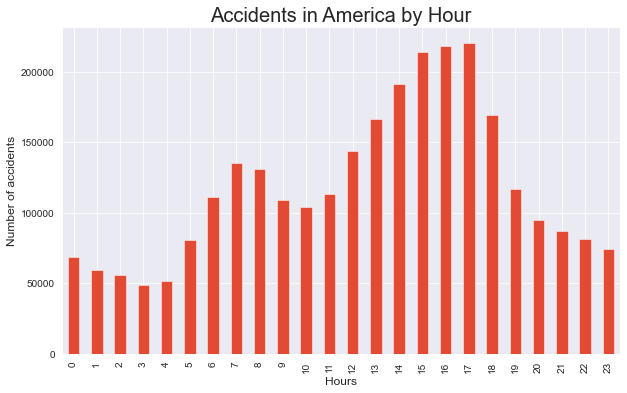

In [55]:
accidents_by_hour.plot(kind='bar', figsize=(10,6));
plt.title('Accidents in America by Hour', fontsize=20)
plt.xlabel('Hours')
plt.ylabel('Number of accidents');

#### Alternative(value counts and bar plot)

In [56]:
accidents.Start_Time.dt.hour.value_counts()

17    220358
16    218385
15    214264
14    191480
18    168982
13    166473
12    143715
7     135191
8     130879
19    116911
11    113271
6     111160
9     108779
10    103926
20     94682
21     87078
22     81188
5      80303
23     74243
0      68800
1      59370
2      55443
4      51805
3      48656
Name: Start_Time, dtype: int64

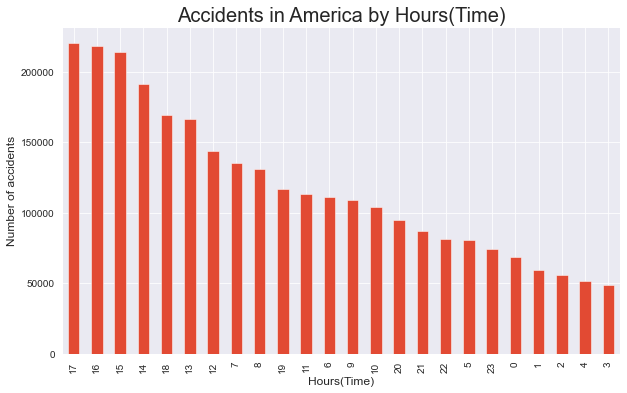

In [57]:
accidents.Start_Time.dt.hour.value_counts().plot(kind='bar',figsize=(10,6));
plt.title('Accidents in America by Hours(Time)', fontsize=20)
plt.xlabel('Hours(Time)')
plt.ylabel('Number of accidents');

#### Alternative(Distplot)

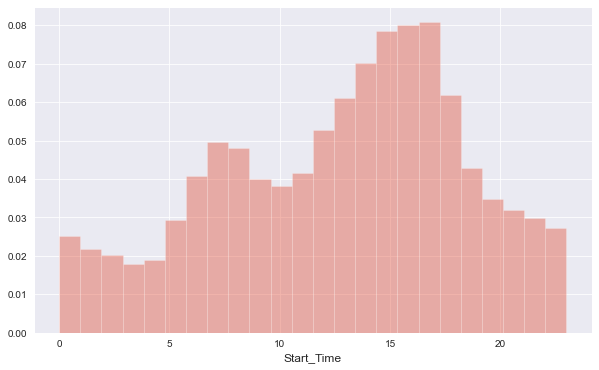

In [58]:
plt.figure(figsize=(10,6))
sns.distplot(accidents.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True);

## Day Analysis

### Show accidents distribution by day of the week?

In [59]:
accidents_by_days = accidents.groupby(accidents.Start_Time.dt.day_name()).count().Start_Time
accidents_by_days

Start_Time
Friday       492074
Monday       419821
Saturday     311691
Sunday       259274
Thursday     463477
Tuesday      443968
Wednesday    455037
Name: Start_Time, dtype: int64

#### Bar plot

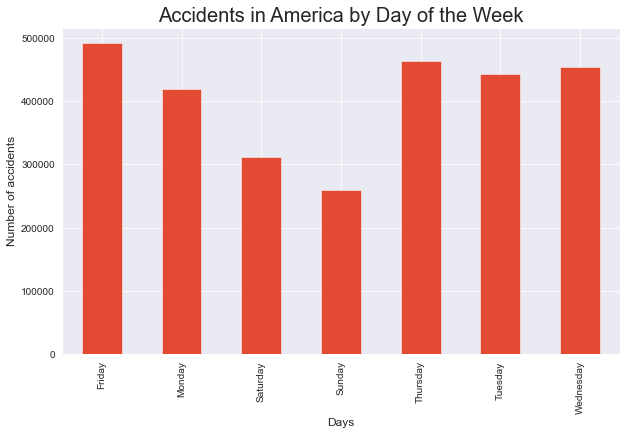

In [60]:
accidents_by_days.plot(kind='bar', figsize=(10,6));
plt.title('Accidents in America by Day of the Week', fontsize=20)
plt.xlabel('Days')
plt.ylabel('Number of accidents');

#### Alternative(using distplot)

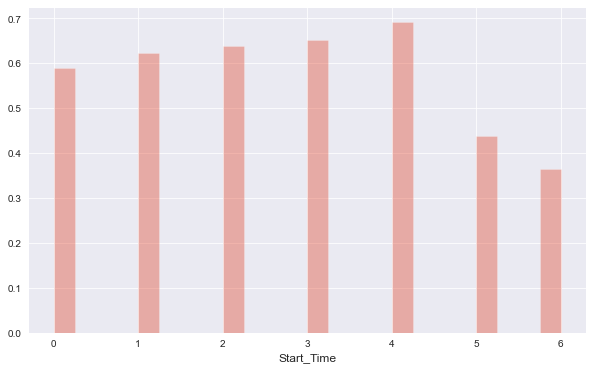

In [61]:
plt.figure(figsize=(10,6))
sns.distplot(accidents.Start_Time.dt.dayofweek, bins=24, kde=False, norm_hist=True);

#### Alternative(using value counts and bar plot)

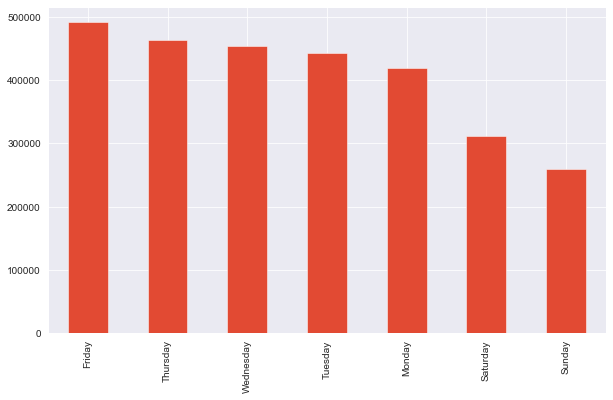

In [62]:
accidents.Start_Time.dt.day_name().value_counts().plot(kind='bar', figsize=(10,6));

### Is the accident distribution by hours the same on weekends as on weekdays?

#### Weekends

In [63]:
weekend_start_time = accidents.Start_Time[accidents.Start_Time.dt.dayofweek > 4]

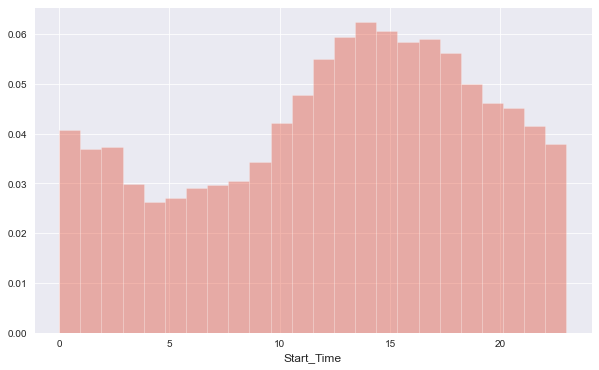

In [64]:
plt.figure(figsize=(10,6))
sns.distplot(weekend_start_time.dt.hour, bins=24, kde=False, norm_hist=True);

#### Bar plot

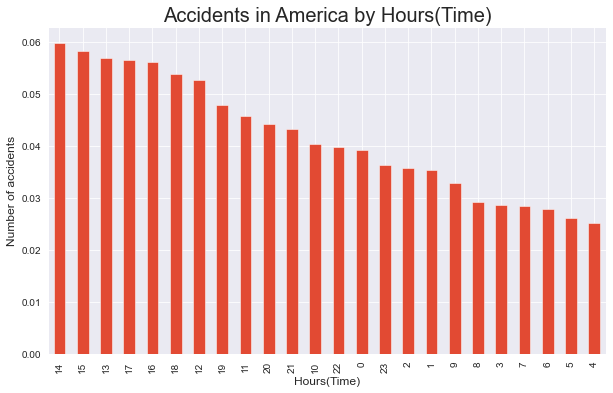

In [65]:
weekend_start_time.dt.hour.value_counts(normalize=True).plot(kind='bar', figsize=(10,6));
plt.title('Accidents in America by Hours(Time)', fontsize=20)
plt.xlabel('Hours(Time)')
plt.ylabel('Number of accidents');

#### Weekdays

In [66]:
weekdays_start_time = accidents.Start_Time[accidents.Start_Time.dt.dayofweek <= 4]

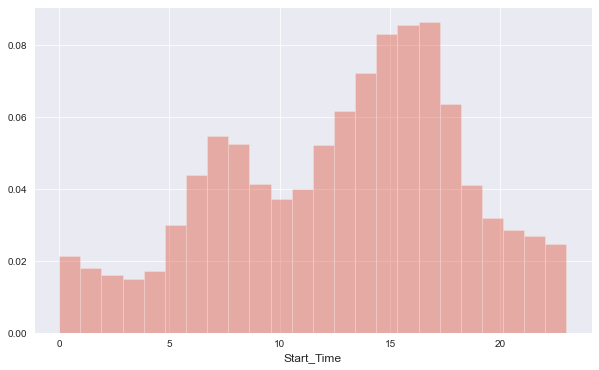

In [67]:
plt.figure(figsize=(10,6))
sns.distplot(weekdays_start_time.dt.hour, bins=24, kde=False, norm_hist=True);

##### Alternative using value counts and bar chart

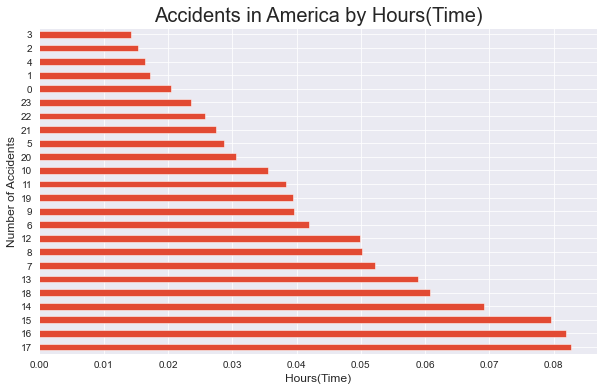

In [68]:
weekdays_start_time.dt.hour.value_counts(normalize=True).plot(kind='barh', figsize=(10,6));
plt.title('Accidents in America by Hours(Time)', fontsize=20)
plt.xlabel('Hours(Time)')
plt.ylabel('Number of Accidents');

## Month Analysis

### Show accident distribution by months

In [69]:
accidents_by_months = accidents.groupby(accidents.Start_Time.dt.month).count().Start_Time
accidents_by_months

Start_Time
1     198365
2     194995
3     158224
4     171880
5     181944
6     226561
7     159111
8     178670
9     241822
10    299131
11    360696
12    473943
Name: Start_Time, dtype: int64

#### Bar plot

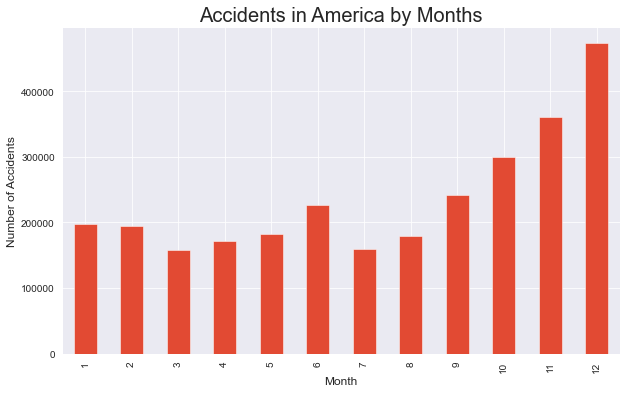

In [70]:
accidents_by_months.plot(kind='bar',figsize=(10,6))
plt.title('Accidents in America by Months', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Accidents');

#### Alternative using Distplot

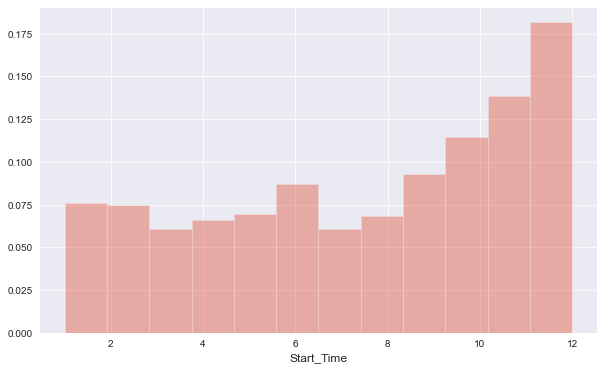

In [71]:
plt.figure(figsize=(10,6))
sns.distplot(accidents.Start_Time.dt.month, bins=12, kde=False, norm_hist=True);

## Year Analysis

### Show accidents distribution by years

In [72]:
accidents_by_year = accidents.groupby(accidents.Start_Time.dt.year).count().Start_Time
accidents_by_year

Start_Time
2016     122024
2017     163918
2018     163176
2019     258615
2020     625864
2021    1511745
Name: Start_Time, dtype: int64

#### Line plot

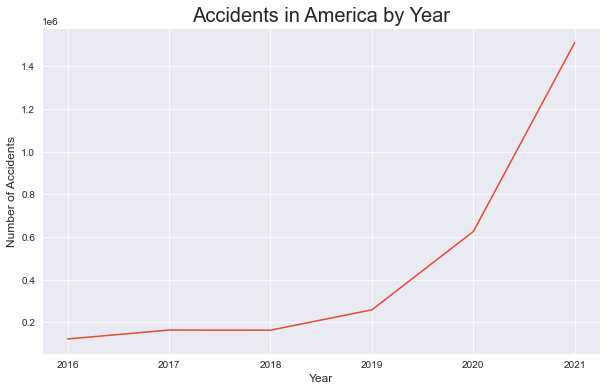

In [73]:
accidents_by_year.plot(figsize=(10,6))
plt.title('Accidents in America by Year', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Accidents');

#### Year 2016

In [74]:
year_2016 = accidents.Start_Time[accidents.Start_Time.dt.year == 2016]

##### Distplot

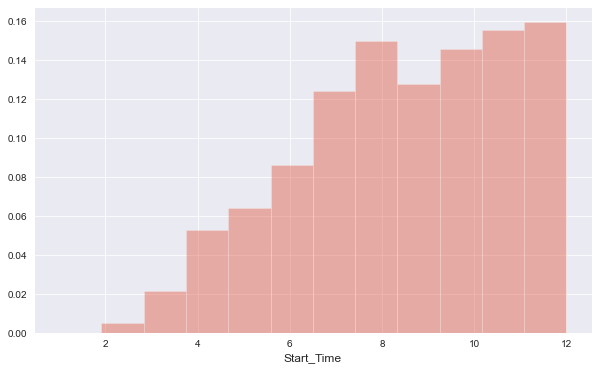

In [75]:
plt.figure(figsize=(10,6))
sns.distplot(year_2016.dt.month, bins=12, kde=False, norm_hist=True);

#### Year 2017

In [76]:
year_2017 = accidents.Start_Time[accidents.Start_Time.dt.year == 2017]

##### Distplot

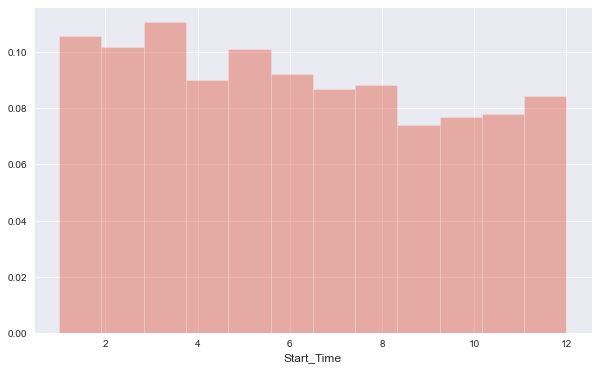

In [77]:
plt.figure(figsize=(10,6))
sns.distplot(year_2017.dt.month, bins=12, kde=False, norm_hist=True);

#### Year 2018

In [78]:
year_2018 = accidents.Start_Time[accidents.Start_Time.dt.year == 2018]

##### Distplot

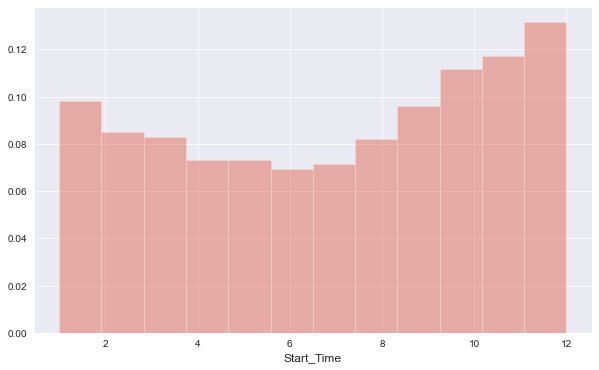

In [79]:
plt.figure(figsize=(10,6))
sns.distplot(year_2018.dt.month, bins=12, kde=False, norm_hist=True);

#### Year 2019

In [80]:
year_2019 = accidents.Start_Time[accidents.Start_Time.dt.year == 2019]

##### Distplot

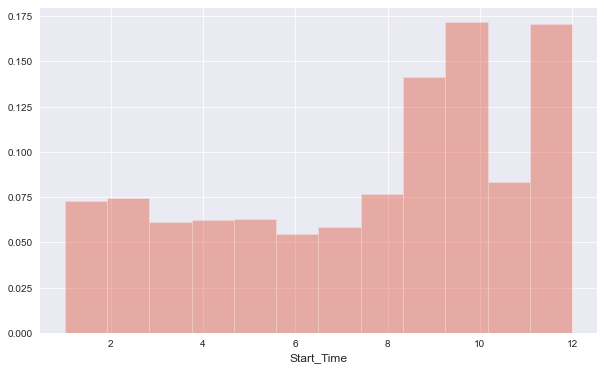

In [81]:
plt.figure(figsize=(10,6))
sns.distplot(year_2019.dt.month, bins=12, kde=False, norm_hist=True);

#### Year 2020

In [82]:
year_2020 = accidents.Start_Time[accidents.Start_Time.dt.year == 2020]

##### Distplot

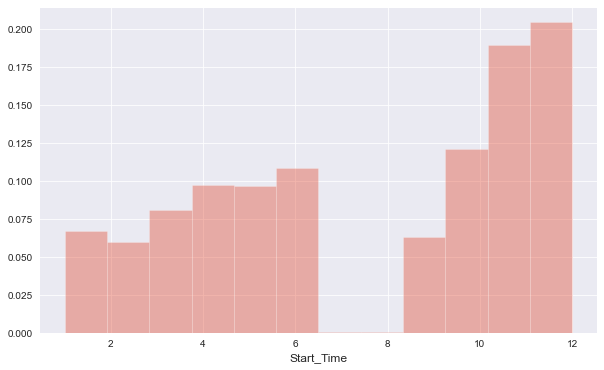

In [83]:
plt.figure(figsize=(10,6))
sns.distplot(year_2020.dt.month, bins=12, kde=False, norm_hist=True);

### Average cases of Accident per day in the United States(2016 - 2021)

In [84]:
per_day = round(accidents_by_year/(6*365))
per_day

Start_Time
2016     56.0
2017     75.0
2018     75.0
2019    118.0
2020    286.0
2021    690.0
Name: Start_Time, dtype: float64

#### Bar plot

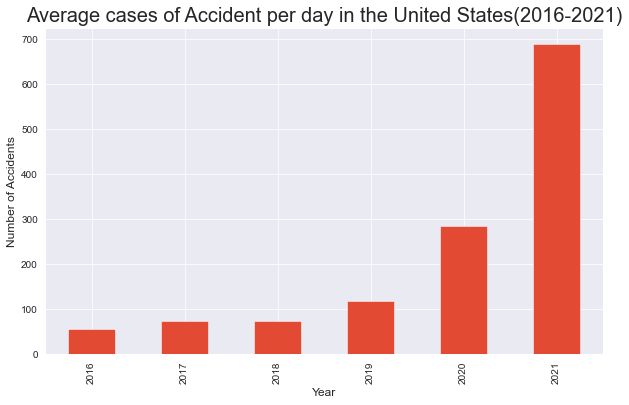

In [85]:
per_day.plot(kind='bar', figsize=(10,6))
plt.title('Average cases of Accident per day in the United States(2016-2021)', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Accidents');

### Average cases of Accident per hour in the United States(2016 - 2021)

In [86]:
per_hour = round(accidents_by_year/(6*365*24))
per_hour

Start_Time
2016     2.0
2017     3.0
2018     3.0
2019     5.0
2020    12.0
2021    29.0
Name: Start_Time, dtype: float64

#### Bar plot

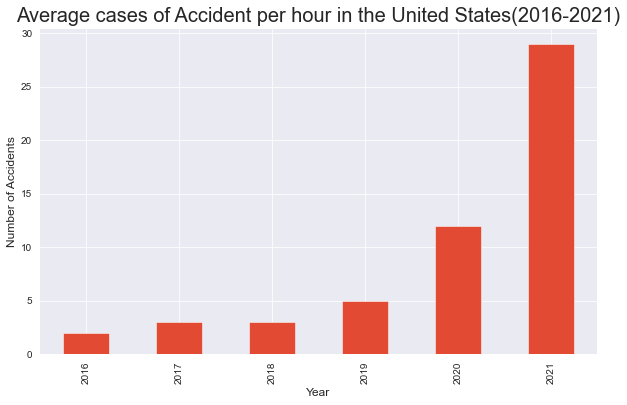

In [87]:
per_hour.plot(kind='bar', figsize=(10,6))
plt.title('Average cases of Accident per hour in the United States(2016-2021)', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Accidents');

### Distribution of Accidents per Hour and Day

In [88]:
accident_hour_day = accidents.groupby([accidents.Start_Time.dt.hour.rename('Hour'), accidents.Start_Time.dt.day_name().rename('Day')]).count().Start_Time
accident_hour_day

Hour  Day      
0     Friday       10151
      Monday        8075
      Saturday     11498
      Sunday       10849
      Thursday      9744
                   ...  
23    Saturday     11711
      Sunday        9011
      Thursday     10529
      Tuesday      10269
      Wednesday    10576
Name: Start_Time, Length: 168, dtype: int64

In [89]:
accident_hour_day.unstack()

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,10151,8075,11498,10849,9744,9062,9421
1,8564,6731,10463,9730,8463,7329,8090
2,7635,6466,10535,9897,7436,6446,7028
3,7256,6360,8046,8293,6715,5863,6123
4,8611,7262,7198,7134,7350,6999,7251
5,13580,12839,7746,7113,13316,12800,12909
6,18088,19201,8506,7380,18973,19908,19104
7,21403,22820,8874,7394,25095,24810,24795
8,20952,21534,9239,7408,23624,24327,23795


#### Bar plot

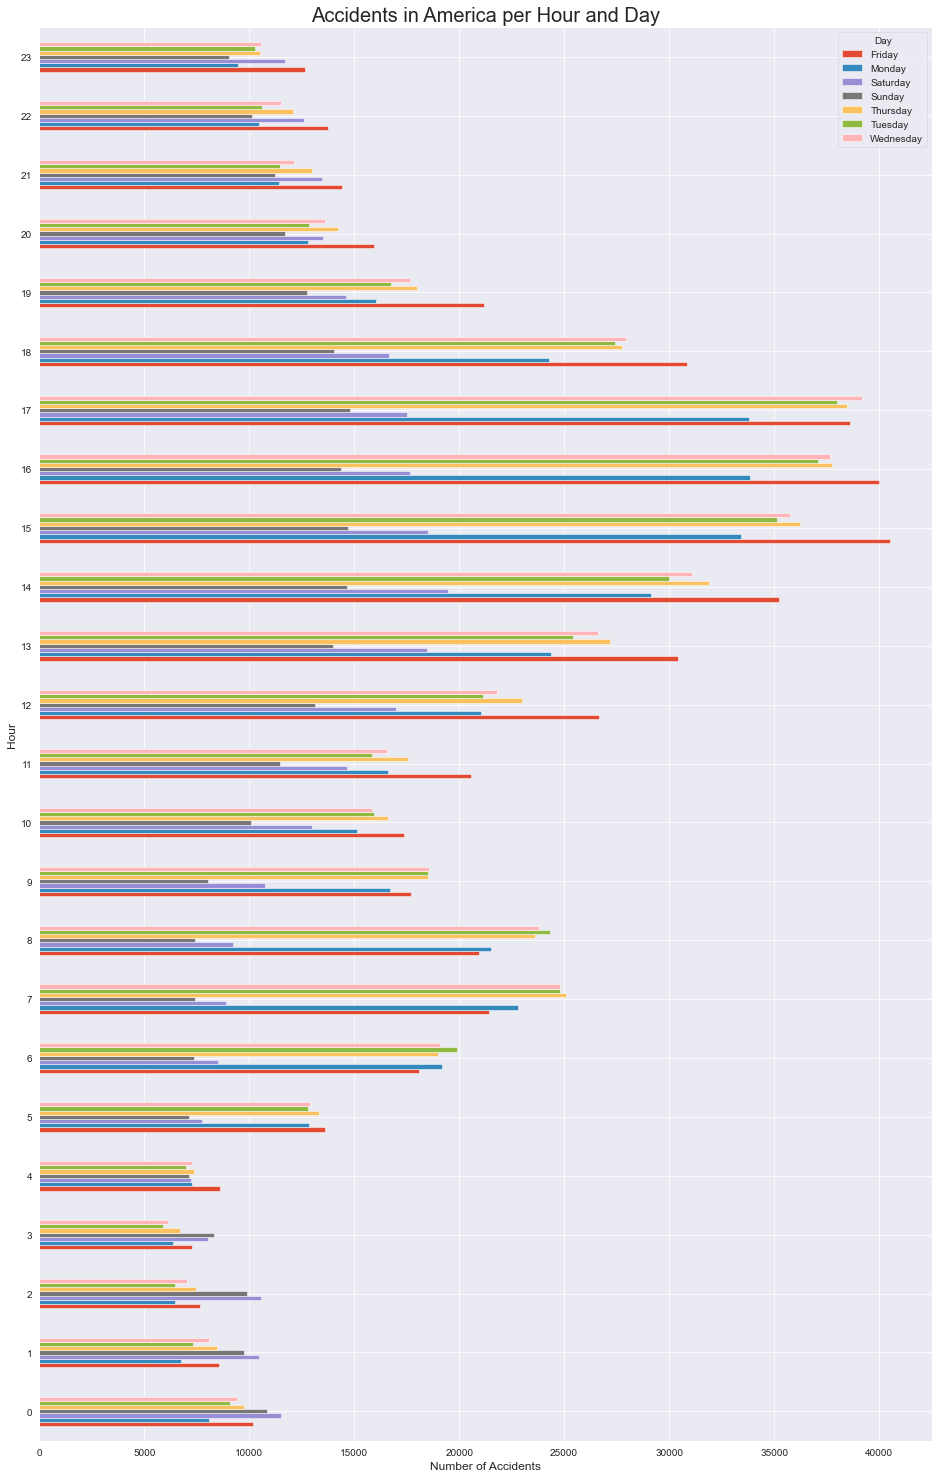

In [90]:
accident_hour_day.unstack().plot(kind=('barh'), figsize=(16,26))
plt.title('Accidents in America per Hour and Day', fontsize=20)
plt.xlabel('Number of Accidents')
plt.ylabel('Hour');

### Insights

####
16) Highest occurence of car accidents happened between 1pm and 6pm, but the first peaked happened between 7am and 8am.
17) Lowest occurence of car accidents happened between 1am and 4am.
18) Fridays recorded the highest number of car Accidents.
19) Sundays have the least number of car Accidents.
20) There were less car accidents on weekends than weekdays.
21) On weekends, the peak occurred between 12noon and 6pm.
22) On weekdays, the highest peak occurred between 1pm and 6pm. This could be said to be as result of the rush of people returning from work.
23) The second peak on weekdays occurred between 6am and 9am. This could be said to be as result of the rush of people going to work.
24) More car accidents occurred more on weekends between 12am to 3am than on weekdays.
25) More car accidents occurred more on weekdays between 6am and 6pm than on  weekends.
26) 2021 recorded the highest number of car accidents, up to 2 times the number in 2020.
27) There were more car accidents in 2020 and 2021 than in the past 4 years.
28) Car accident peak occurred towards the end of the year(winter). Note that data is missing for Jan 2016, July/August 2020 and maybe more.
29) In 2017, more car accidents occurred in the beginning of the year.
30) In the year 2021, averagely 690 car accidents happened per day in US.
31) From 2019 to 2021 the average car accident per day has increased up to 6 times in USA.
32) In the year 2016, averagely 2 car accidents happened per hour in USA. 
33) In the year 2021, averagely 29 car accidents happened per hour in USA.
34) Compare to 2019 the average car accident per hour has increased 6 times in 2021.

## Traffic Flow Analysis

### Show Accidents Severity impact on Traffic

In [91]:
accidents.Severity.unique()

array([3, 2, 4, 1], dtype=int64)

In [92]:
def func(Severity):
    if Severity == 4:
        return 'Highly Severe(4)'
    elif Severity == 3:
        return 'Severe(3)'
    elif Severity == 2:
        return 'Moderate(2)'
    else:
        return 'Mild(1)'

In [93]:
accidents['Severity_Rate'] = accidents.Severity.apply(func)

In [94]:
accidents.Severity_Rate.value_counts() * 100 / len(accidents)

Moderate(2)         89.022374
Severe(3)            5.451190
Highly Severe(4)     4.610799
Mild(1)              0.915637
Name: Severity_Rate, dtype: float64

#### Pie Chart

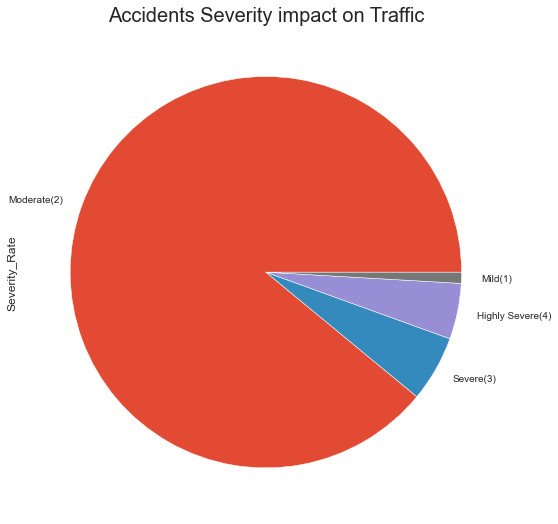

In [95]:
accidents.Severity_Rate.value_counts().plot(kind='pie', figsize=(9,9))
plt.title('Accidents Severity impact on Traffic', fontsize=20);

### Show Accident Severity impact on Traffic distribution by years

In [96]:
accidents['Accident_Year'] = accidents.Start_Time.dt.year
accidents.Accident_Year

ID
A-1          2016
A-2          2016
A-3          2016
A-4          2016
A-5          2016
             ... 
A-2845338    2019
A-2845339    2019
A-2845340    2019
A-2845341    2019
A-2845342    2019
Name: Accident_Year, Length: 2845342, dtype: int64

In [97]:
accidents.pivot_table('Start_Time','Accident_Year','Severity_Rate', aggfunc='count')

Severity_Rate,Highly Severe(4),Mild(1),Moderate(2),Severe(3)
Accident_Year,,,,
2016,13798.0,NaN,86758.0,21468.0
2017,23164.0,NaN,110365.0,30389.0
2018,24435.0,NaN,108568.0,30173.0
2019,23587.0,NaN,204759.0,30269.0
2020,22177.0,26053.0,534828.0,42806.0
2021,24032.0,NaN,1487713.0,NaN


#### Alternative

In [98]:
accidents.loc[:,['Accident_Year','Severity_Rate','Start_Time']].groupby(['Accident_Year','Severity_Rate']).agg(Severity_Count=('Start_Time','count'))

Severity_Count
Accident_Year Severity_Rate                   
2016          Highly Severe(4)           13798
              Moderate(2)                86758
              Severe(3)                  21468
2017          Highly Severe(4)           23164
              Moderate(2)               110365
              Severe(3)                  30389
2018          Highly Severe(4)           24435
              Moderate(2)               108568
              Severe(3)                  30173
2019          Highly Severe(4)           23587
              Moderate(2)               204759
              Severe(3)                  30269
2020          Highly Severe(4)           22177
              Mild(1)                    26053
              Moderate(2)               534828
              Severe(3)                  42806
2021          Highly Severe(4)           24032
              Moderate(2)              1487713

#### Bar plot

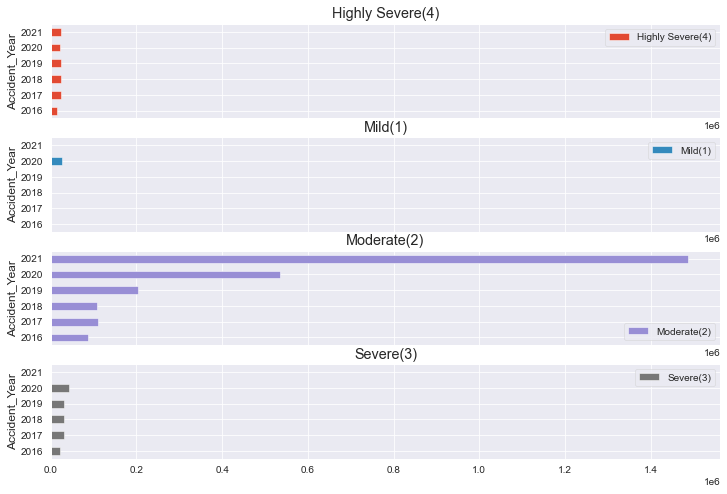

In [99]:
accidents.pivot_table('Start_Time','Accident_Year','Severity_Rate', aggfunc='count').plot(kind='barh',subplots=True, figsize=(12,8));

### Accident Duration on Traffic Flow

In [100]:
accidents['Duration'] = accidents.End_Time - accidents.Start_Time
accidents.Duration

ID
A-1         0 days 06:00:00
A-2         0 days 06:00:00
A-3         0 days 06:00:00
A-4         0 days 06:00:00
A-5         0 days 06:00:00
                  ...      
A-2845338   0 days 00:28:36
A-2845339   0 days 00:26:53
A-2845340   0 days 00:28:28
A-2845341   0 days 00:29:21
A-2845342   0 days 00:29:25
Name: Duration, Length: 2845342, dtype: timedelta64[ns]

In [101]:
top10_accidents_duration = accidents.Duration.value_counts().head(10)
top10_accidents_duration

0 days 06:00:00    353058
0 days 04:00:00     55394
0 days 00:15:00     37038
0 days 00:30:00     35345
0 days 01:00:00     28845
0 days 01:15:00     25794
0 days 01:45:00     24615
0 days 00:45:00     18568
0 days 02:00:00     16625
0 days 00:20:00     12938
Name: Duration, dtype: int64

In [102]:
top10_accidents_duration_df = top10_accidents_duration.reset_index().rename(columns={'index':'Duration', 'Duration':'Accident_Cases'})
top10_accidents_duration_df

,Duration,Accident_Cases
0,0 days 06:00:00,353058
1,0 days 04:00:00,55394
2,0 days 00:15:00,37038
3,0 days 00:30:00,35345
4,0 days 01:00:00,28845
5,0 days 01:15:00,25794
6,0 days 01:45:00,24615
7,0 days 00:45:00,18568
8,0 days 02:00:00,16625
9,0 days 00:20:00,12938


In [103]:
duration = [str(i).split('days')[-1].strip() for i in top10_accidents_duration_df.Duration]
duration

['06:00:00',
 '04:00:00',
 '00:15:00',
 '00:30:00',
 '01:00:00',
 '01:15:00',
 '01:45:00',
 '00:45:00',
 '02:00:00',
 '00:20:00']

In [104]:
top10_accidents_duration_df.Duration = duration

In [105]:
top10_accidents_duration_df.set_index('Duration', inplace = True)
top10_accidents_duration_df

,Accident_Cases
Duration,
06:00:00,353058
04:00:00,55394
00:15:00,37038
00:30:00,35345
01:00:00,28845
01:15:00,25794
01:45:00,24615
00:45:00,18568
02:00:00,16625


#### Bar plot

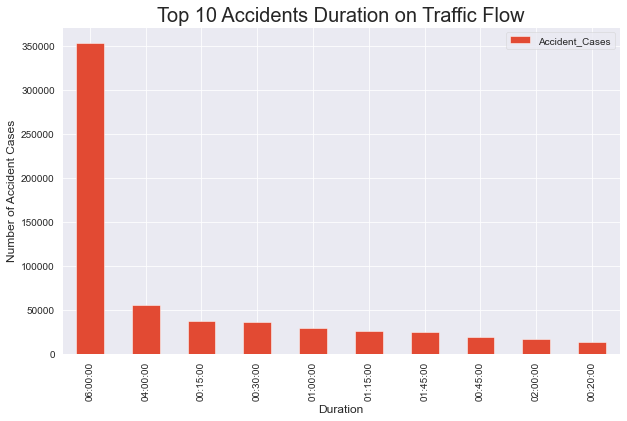

In [106]:
top10_accidents_duration_df.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Accidents Duration on Traffic Flow', fontsize=20)
plt.xlabel('Duration')
plt.ylabel('Number of Accident Cases');

### Insights

#### 
35) In 89% of car accident cases, the impact on the traffic was 2(Moderate).
36) In 5% of car accident cases, the impact on the traffic was 3(Severe).
37) In 5% of car accident cases, the impact on the traffic was 4(Highly Severe).
38) In 1% of car accident cases, the impact on the traffic was 1(Mild).
39) Majority of yearly car accidents impact on traffic in the past 6 years were Moderate.
40) No accident records for Mild impact on traffic for 2016, 2017, 2018, 2019, 2021.
41) Majority of car accidents impacted on traffic flow for 6 hours.

## Road Analysis

### Presence of Bumps

In [107]:
bump_presence = accidents.Bump.value_counts() * 100/len(accidents)
bump_presence

False    99.964117
True      0.035883
Name: Bump, dtype: float64

#### Pie chart

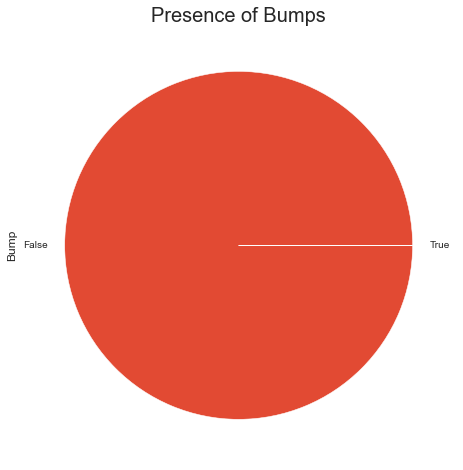

In [108]:
bump_presence.plot(kind='pie', figsize=(8,8))
plt.title('Presence of Bumps', fontsize=20);

### Presence of Traffic Signal 

In [109]:
traffic_signal_presence = accidents.Traffic_Signal.value_counts() * 100/len(accidents)
traffic_signal_presence

False    90.677289
True      9.322711
Name: Traffic_Signal, dtype: float64

#### Pie chart

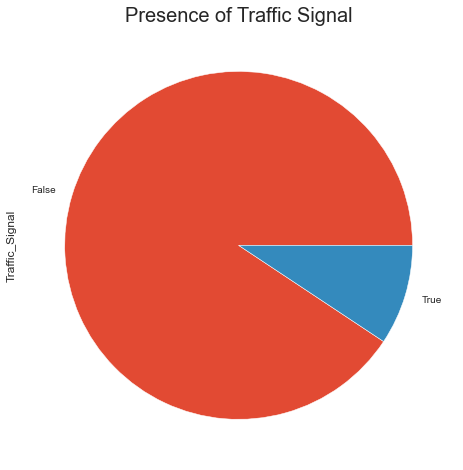

In [110]:
traffic_signal_presence.plot(kind='pie', figsize=(8,8))
plt.title('Presence of Traffic Signal', fontsize=20);

### Presence of Give Way

In [111]:
give_way_presence = accidents.Give_Way.value_counts() * 100/len(accidents)
give_way_presence

False    99.758623
True      0.241377
Name: Give_Way, dtype: float64

#### Pie chart

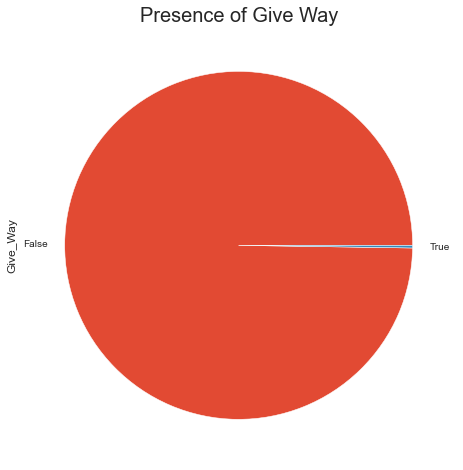

In [112]:
give_way_presence.plot(kind='pie', figsize=(8,8))
plt.title('Presence of Give Way', fontsize=20);

### Presence of Roundabout

In [113]:
roundabout_presence = accidents.Roundabout.value_counts() * 100/len(accidents)
roundabout_presence

False    99.995677
True      0.004323
Name: Roundabout, dtype: float64

#### Pie chart

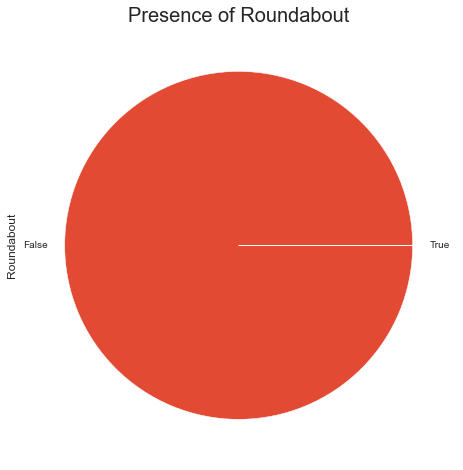

In [114]:
roundabout_presence.plot(kind='pie', figsize=(8,8))
plt.title('Presence of Roundabout', fontsize=20);

### Presence of Junction

In [115]:
junction_presence = accidents.Junction.value_counts() * 100/len(accidents)
junction_presence

False    89.790155
True     10.209845
Name: Junction, dtype: float64

#### Pie chart

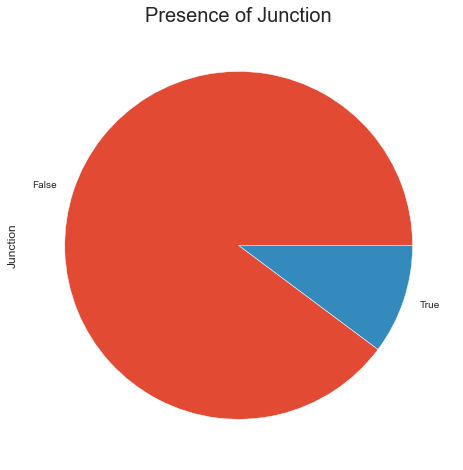

In [116]:
junction_presence.plot(kind='pie', figsize=(8,8))
plt.title('Presence of Junction', fontsize=20);

### Presence of Crossing

In [117]:
crossing_presence = accidents.Crossing.value_counts() * 100/len(accidents)
crossing_presence

False    92.963517
True      7.036483
Name: Crossing, dtype: float64

#### Pie chart

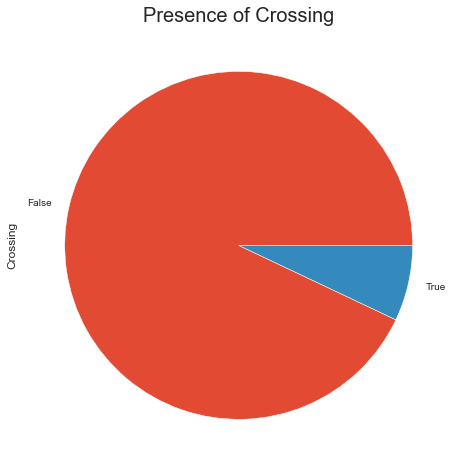

In [118]:
crossing_presence.plot(kind='pie', figsize=(8,8))
plt.title('Presence of Crossing', fontsize=20);

### Presence of No Exit

In [119]:
no_exit_presence = accidents.No_Exit.value_counts() * 100/len(accidents)
no_exit_presence

False    99.849087
True      0.150913
Name: No_Exit, dtype: float64

#### Pie chart

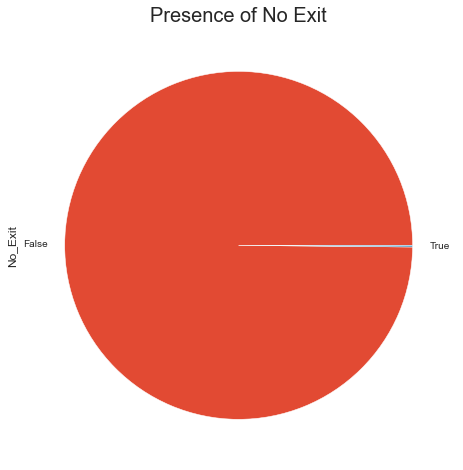

In [120]:
no_exit_presence.plot(kind='pie', figsize=(8,8))
plt.title('Presence of No Exit', fontsize=20);

### Presence of Turning Loop

In [121]:
turning_loop_presence = accidents.Turning_Loop.value_counts() * 100/len(accidents)
turning_loop_presence

False    100.0
Name: Turning_Loop, dtype: float64

#### Pie chart

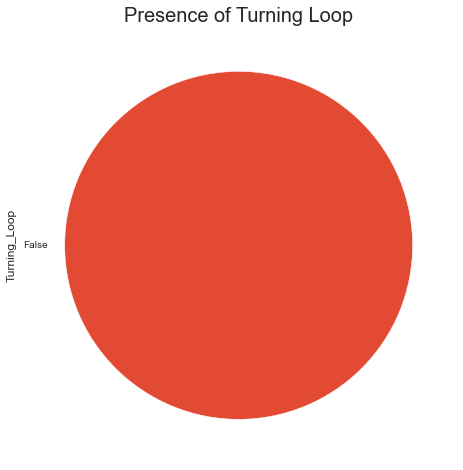

In [122]:
turning_loop_presence.plot(kind='pie', figsize=(8,8))
plt.title('Presence of Turning Loop', fontsize=20);

### Insights

####
42) Almost in every case (99.9%) Bumper was absent in the accident spot.
43) 9.3% car accident cases recorded near the Traffic Signal.
44) Almost in every case (99.7%), car accidents did not happen near Give Way.
45) Almost in every case (99.9%) Roundabout was absent in the car accident spot.
46) 10.2% car accident cases recorded near the junctions.
47) In 7.03% cases, car accidents happened near the crossing.
48) Almost in every case (99.84%) No Exit was absent in the car accident spot.
49) There are no car accident cases recorded near the Turning Loop.

## Weather Analysis

### Show Top 10 Weather Conditions where the highest number of accidents were recorded

In [123]:
weather_conditions = accidents.Weather_Condition.value_counts() * 100/len(accidents)
weather_conditions.head(10)

Fair                38.912510
Mostly Cloudy       12.791397
Cloudy              12.257472
Partly Cloudy        8.784146
Clear                6.109037
Light Rain           4.512744
Overcast             2.983191
Scattered Clouds     1.586171
Light Snow           1.537671
Fog                  1.448894
Name: Weather_Condition, dtype: float64

#### Bar plot

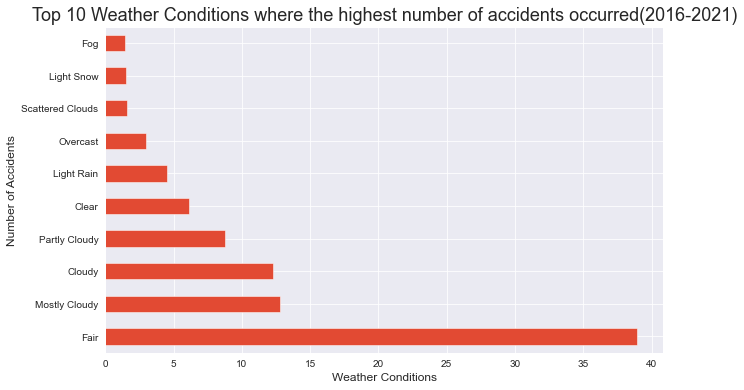

In [124]:
weather_conditions.head(10).plot(kind='barh', figsize=(10,6))
plt.title('Top 10 Weather Conditions where the highest number of accidents occurred(2016-2021)', fontsize=18)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents');

### Show Top 20 Temperature level where the highest number of accidents were recorded

In [125]:
temperature = accidents['Temperature(F)'].value_counts() * 100/len(accidents)
temperature.head(20)

73.0    2.267039
77.0    2.234354
75.0    2.127477
72.0    2.097498
68.0    2.057995
63.0    2.047522
64.0    2.036205
70.0    2.029984
66.0    1.979938
59.0    1.969008
79.0    1.956636
61.0    1.921210
57.0    1.900334
54.0    1.890880
50.0    1.847300
55.0    1.785374
81.0    1.778767
52.0    1.705805
82.0    1.686019
76.0    1.512929
Name: Temperature(F), dtype: float64

#### Bar plot

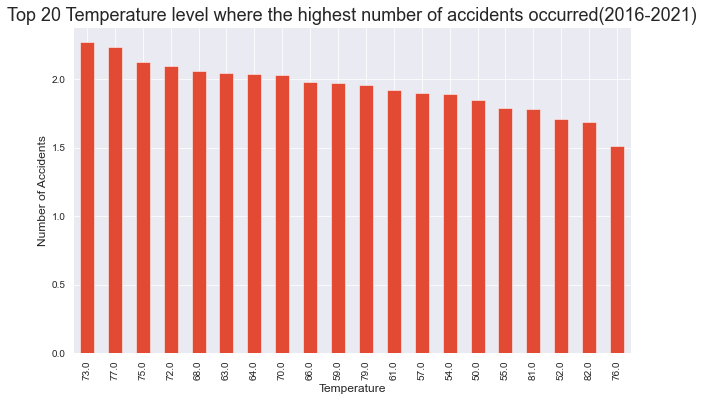

In [126]:
temperature.head(20).plot(kind='bar', figsize=(10,6))
plt.title('Top 20 Temperature level where the highest number of accidents occurred(2016-2021)', fontsize=18)
plt.xlabel('Temperature')
plt.ylabel('Number of Accidents');

### Show Top 20 Air Pressure level where the highest number of accidents were recorded

In [127]:
pressure = accidents['Pressure(in)'].value_counts() * 100/len(accidents)
pressure.head(20)

29.96    1.534719
29.94    1.517041
29.99    1.510469
30.01    1.466818
30.03    1.457716
30.04    1.428686
29.97    1.419689
30.00    1.412062
29.95    1.408759
29.93    1.387320
29.91    1.383278
29.98    1.370767
30.02    1.368728
29.92    1.361629
30.06    1.333653
29.90    1.298719
29.88    1.257564
29.89    1.236161
30.05    1.208677
30.07    1.201859
Name: Pressure(in), dtype: float64

#### Bar plot

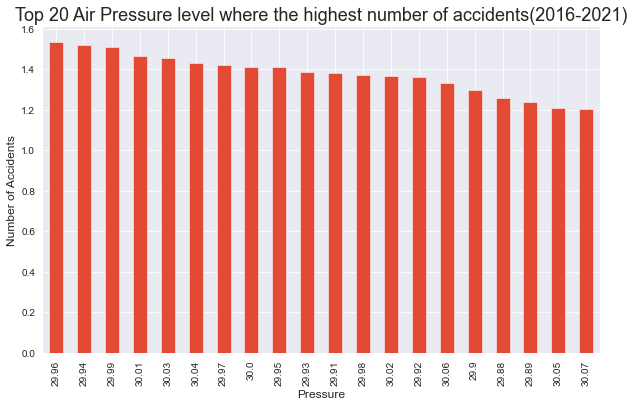

In [128]:
pressure.head(20).plot(kind='bar', figsize=(10,6))
plt.title('Top 20 Air Pressure level where the highest number of accidents(2016-2021)', fontsize=18)
plt.xlabel('Pressure')
plt.ylabel('Number of Accidents');

### Show Top 20 Humidity level where the highest number of accidents were recorded

In [129]:
humidity = accidents['Humidity(%)'].value_counts() * 100/len(accidents)
humidity.head(20)

93.0     3.641285
100.0    3.405812
87.0     2.117004
90.0     2.023904
89.0     1.876611
86.0     1.676494
82.0     1.644547
81.0     1.593130
67.0     1.587858
96.0     1.585433
83.0     1.576893
74.0     1.569231
72.0     1.565330
65.0     1.554435
84.0     1.534754
63.0     1.509098
78.0     1.484637
59.0     1.476413
79.0     1.473707
69.0     1.455220
Name: Humidity(%), dtype: float64

#### Bar plot

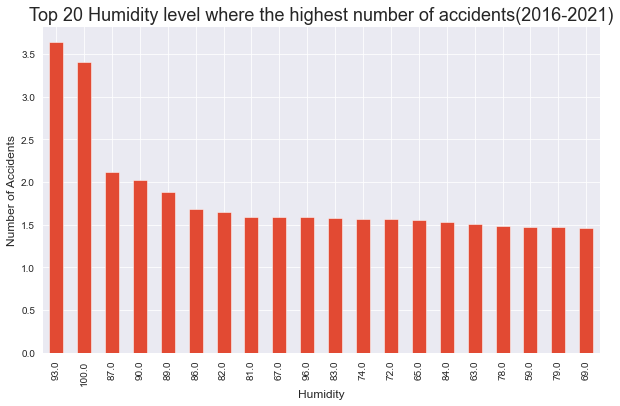

In [130]:
humidity.head(20).plot(kind='bar', figsize=(10,6))
plt.title('Top 20 Humidity level where the highest number of accidents(2016-2021)', fontsize=18)
plt.xlabel('Humidity')
plt.ylabel('Number of Accidents');

### Show Top 20 Visibility level where the highest number of accidents were recorded

In [131]:
visibility = accidents['Visibility(mi)'].value_counts() * 100/len(accidents)
visibility.head(20)

10.00    78.383407
7.00      2.799277
9.00      2.418584
8.00      1.966547
5.00      1.895484
6.00      1.723905
2.00      1.622301
4.00      1.596891
3.00      1.546809
1.00      1.351156
0.50      0.431934
0.25      0.399214
0.75      0.289877
2.50      0.152425
0.00      0.113800
13.00     0.109512
0.20      0.100867
1.50      0.086035
15.00     0.080939
0.80      0.071556
Name: Visibility(mi), dtype: float64

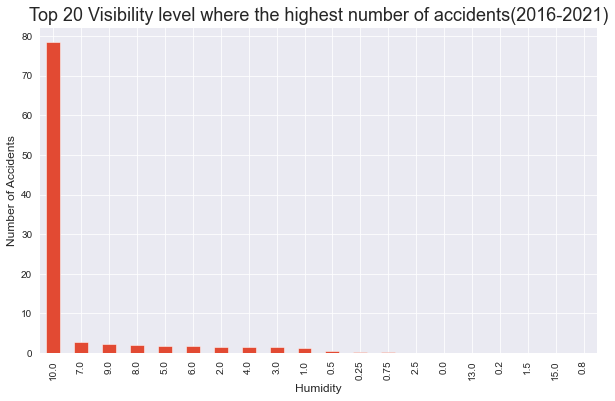

In [132]:
visibility.head(20).plot(kind='bar', figsize=(10,6))
plt.title('Top 20 Visibility level where the highest number of accidents(2016-2021)', fontsize=18)
plt.xlabel('Humidity')
plt.ylabel('Number of Accidents');

### Show Top 20 Wind Chill level where the highest number of accidents were recorded

In [133]:
wind_chill = accidents['Wind_Chill(F)'].value_counts() * 100/len(accidents)
wind_chill.head(20)

73.0    1.985420
77.0    1.875311
75.0    1.859109
72.0    1.834437
63.0    1.784812
64.0    1.770402
70.0    1.763830
79.0    1.719864
66.0    1.719618
68.0    1.705138
54.0    1.683488
57.0    1.669817
61.0    1.669501
59.0    1.625429
55.0    1.581462
81.0    1.562940
50.0    1.542345
52.0    1.513210
74.0    1.499293
76.0    1.498941
Name: Wind_Chill(F), dtype: float64

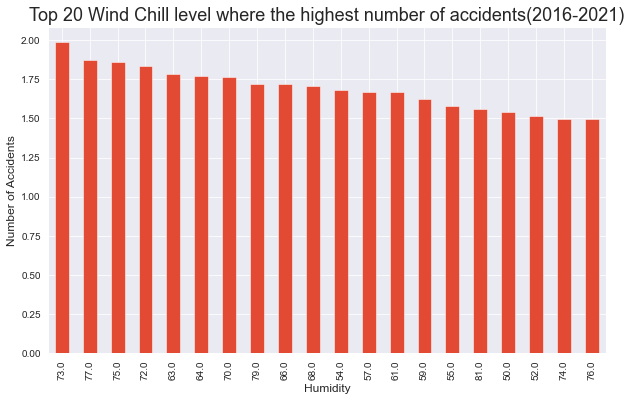

In [134]:
wind_chill.head(20).plot(kind='bar', figsize=(10,6))
plt.title('Top 20 Wind Chill level where the highest number of accidents(2016-2021)', fontsize=18)
plt.xlabel('Humidity')
plt.ylabel('Number of Accidents');

### Show Top 20 Wind Speed level where the highest number of accidents were recorded

In [135]:
wind_speed = accidents['Wind_Speed(mph)'].value_counts() * 100/len(accidents)
wind_speed.head(20)

0.0     15.240207
5.0      8.118532
3.0      7.930997
6.0      7.819868
7.0      7.228200
8.0      6.468010
9.0      5.803415
10.0     4.774470
12.0     4.112089
13.0     3.123421
14.0     2.505639
15.0     2.357889
5.8      1.596539
4.6      1.581146
6.9      1.513034
3.5      1.491174
16.0     1.417018
8.1      1.403873
9.2      1.274680
10.4     1.072138
Name: Wind_Speed(mph), dtype: float64

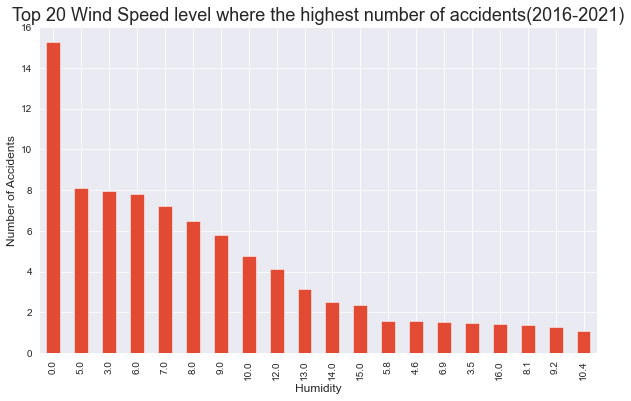

In [136]:
wind_speed.head(20).plot(kind='bar', figsize=(10,6))
plt.title('Top 20 Wind Speed level where the highest number of accidents(2016-2021)', fontsize=18)
plt.xlabel('Humidity')
plt.ylabel('Number of Accidents');

### Insights

####
50) In most car accident cases(approximately 39%), the weather was Fair and approximately in 13% of the cases it was mostly cloudy.
51) In most car accident cases, the temperature range was between 51(F) - 81(F).
52) In most car accident cases, the air pressure range was between 20(in) - 30(in).
53) In maximum cases of car accident, the humidity range was between 80% - 100%.
54) In maximum cases (78.38%) of car accident, the Visibility was 10(mi).
55) In most of the cases of car accident, the wind chill range was between 57(F) - 77(F).
56) In most cases of car accident, the wind speed range was between 0.0(mph) - 10.0(mph). With 0.0(mph) having a percent of 15.24.

## Conclusion

#### All Insights
1) 11682 cities were recorded in the dataset. 
2) Miami is the city with the highest car accidents.
3) Less than 4% of cities have more than 1000 yearly car accidents.
4) Total of 3399 cities have reported just between 1 to 10 car accidents in the dataset.
5) Number of car accidents per city decreases exponentially.
6) Califonia is the state with the highest car accident records. Maybe because it's 3x bigger than Florida(2nd highest state).
7) 14 states have car accidents greater or equal to 50000.
8) US/Eastern is the timezone with highest record of car accidents(1221927).
9) US/Mountain is the timezone with least record of car accidents(164597).
10) There are a total of 93,048 Streets recorded in the dataset.
11) Street NO I-95 has the highest number of car Accidents, followed by Street I-5N
12) There are 64,154 Streets (40%) with only 1 car accident record in past 6 years.
13) 98% Streets of America have less than 100 car accident cases.
14) Only 0.2% Streets of America have car accident cases greater than 1000.
15) Just 56 Streets in America have car accident cases greater than 5000.
16) Highest occurence of car accidents happened between 1pm and 6pm, but the first peaked happened between 7am and 8am.
17) Lowest occurence of car accidents happened between 1am and 4am.
18) Fridays recorded the highest number of car Accidents.
19) Sundays have the least number of car Accidents.
20) There were less car accidents on weekends than weekdays.
21) On weekends, the peak occurred between 12noon and 6pm.
22) On weekdays, the highest peak occurred between 1pm and 6pm. This could be said to be as result of the rush of people returning from work.
23) The second peak on weekdays occurred between 6am and 9am. This could be said to be as result of the rush of people going to work.
24) More car accidents occurred more on weekends between 12am to 3am than on weekdays.
25) More car accidents occurred more on weekdays between 6am and 6pm than on  weekends.
26) 2021 recorded the highest number of car accidents, up to 2 times the number in 2020.
27) There were more car accidents in 2020 and 2021 than in the past 4 years.
28) Car accident peak occurred towards the end of the year(winter). Note that data is missing for Jan 2016, July/August 2020 and maybe more.
29) In 2017, more car accidents occurred in the beginning of the year.
30) In the year 2021, averagely 690 car accidents happened per day in US.
31) From 2019 to 2021 the average car accident per day has increased up to 6 times in USA.
32) In the year 2016, averagely 2 car accidents happened per hour in USA. 
33) In the year 2021, averagely 29 car accidents happened per hour in USA.
34) Compare to 2019 the average car accident per hour has increased 6 times in 2021.
35) In 89% of car accident cases, the impact on the traffic was 2(Moderate).
36) In 5% of car accident cases, the impact on the traffic was 3(Severe).
37) In 5% of car accident cases, the impact on the traffic was 4(Highly Severe).
38) In 1% of car accident cases, the impact on the traffic was 1(Mild).
39) Majority of yearly car accidents impact on traffic in the past 6 years were Moderate.
40) No accident records for Mild impact on traffic for 2016, 2017, 2018, 2019, 2021.
41) Majority of car accidents impacted on traffic flow for 6 hours.
42) Almost in every case (99.9%) Bumper was absent in the accident spot.
43) 9.3% car accident cases recorded near the Traffic Signal.
44) Almost in every case (99.7%), car accidents did not happen near Give Way.
45) Almost in every case (99.9%) Roundabout was absent in the car accident spot.
46) 10.2% car accident cases recorded near the junctions.
47) In 7.03% cases, car accidents happened near the crossing.
48) Almost in every case (99.84%) No Exit was absent in the car accident spot.
49) There are no car accident cases recorded near the Turning Loop.
50) In most car accident cases(approximately 39%), the weather was Fair and approximately in 13% of the cases it was mostly cloudy.
51) In most car accident cases, the temperature range was between 51(F) - 81(F).
52) In most car accident cases, the air pressure range was between 20(in) - 30(in).
53) In maximum cases of car accident, the humidity range was between 80% - 100%.
54) In maximum cases (78.38%) of car accident, the Visibility was 10(mi).
55) In most of the cases of car accident, the wind chill range was between 57(F) - 77(F).
56) In most cases of car accident, the wind speed range was between 0.0(mph) - 10.0(mph). With 0.0(mph) having a percent of 15.24.